## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## February 7, 2018: Combinatorics (part 2 of 2): Graphs

Administrivia:

- All waitlisted students have been cleared to enroll in the course. Thank you for your patience.


### Graphs

In combinatorics, a [*graph*](https://en.wikipedia.org/wiki/Graph_theory) is not the plot of a function; it is a mathematical abstraction of a *network*. It consists of a (usually finite) set of *vertices*, together with a collection of unordered pairs of vertices called *edges*. (More precisely, this is an *undirected graph without self-loops*. If the pairs are ordered, this would be a *directed graph* or *digraph*.)

There are many ways to construct a graph in Sage. Perhaps the easiest one is to specify a list of pairs of vertices (letting Sage guess what the vertices are).

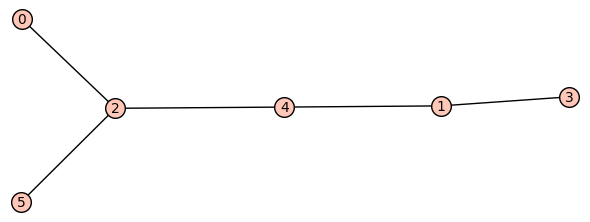

In [28]:
G = Graph([(0,2), (1,3), (2,4), (1,4), (2,5)])
G.plot()

In [29]:
G.vertices()

[0, 1, 2, 3, 4, 5]

In [30]:
G.edges?

[(0, 2, None), (1, 3, None), (1, 4, None), (2, 4, None), (2, 5, None)]

In [0]:
G.plot?

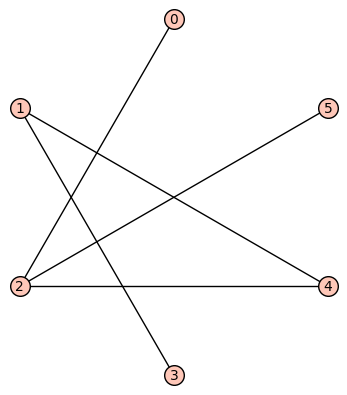

In [31]:
G.plot(layout='circular')

Another way to specify a graph is via an *adjacency matrix*. This is a symmetric matrix of 0s and 1s that tells you which pairs of vertices are edges.

In [32]:
G.adjacency_matrix()

[0 0 1 0 0 0]
[0 0 0 1 1 0]
[1 0 0 0 1 1]
[0 1 0 0 0 0]
[0 1 1 0 0 0]
[0 0 1 0 0 0]

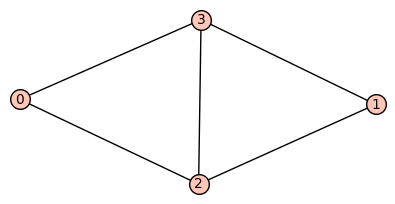

True

In [33]:
M = Matrix([[0,0,1,1],[0,0,1,1],[1,1,0,1],[1,1,1,0]])
G = Graph(M)
show(G)
G.adjacency_matrix() == M

You can also find some standard examples using the *networkx* package...

In [34]:
import networkx

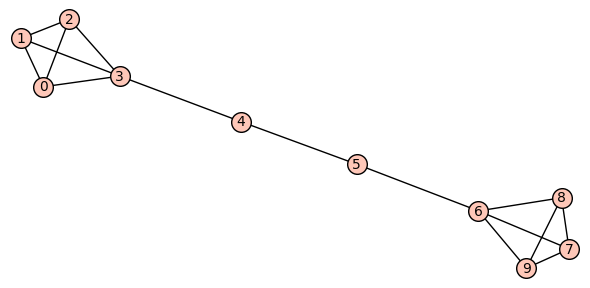

In [42]:
G = Graph(networkx.barbell_graph(4,2))
plot(G)

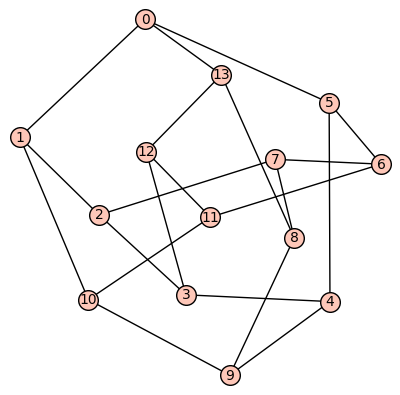

In [43]:
G = Graph(networkx.heawood_graph())
plot(G)

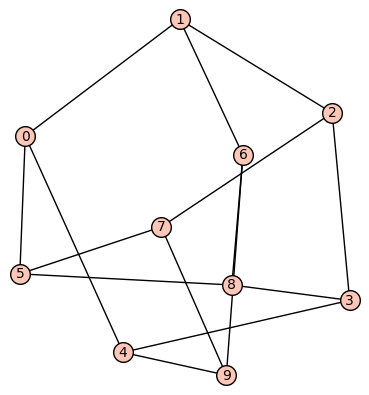

In [44]:
G = Graph(networkx.petersen_graph())
show(G)

... or the graphs object.

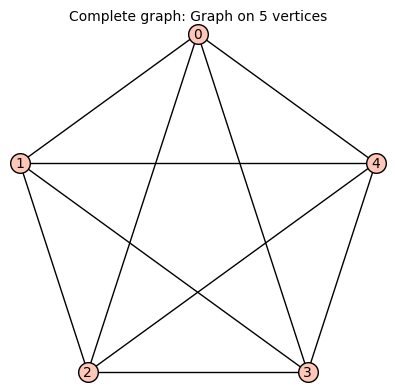

In [45]:
graphs.CompleteGraph(5)

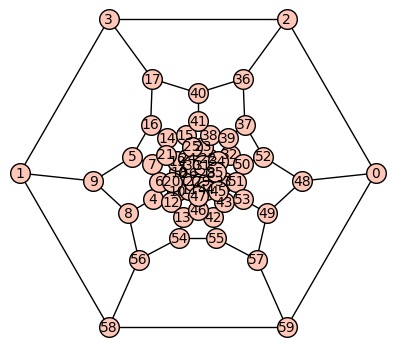

In [46]:
show(graphs.BuckyBall())

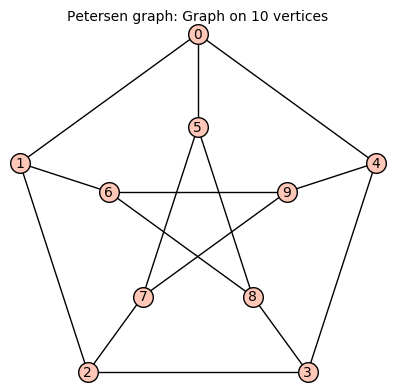

In [47]:
graphs.PetersenGraph()

This includes various types of *random* graphs.

In [0]:
graphs.RandomGNP?

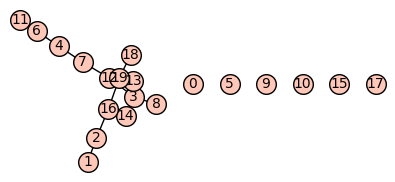

In [54]:
show(graphs.RandomGNP(20, 0.075))

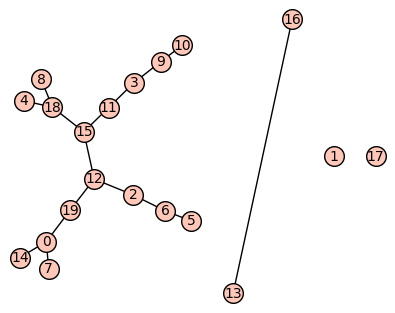

In [48]:
show(graphs.RandomGNP(20, 0.1))

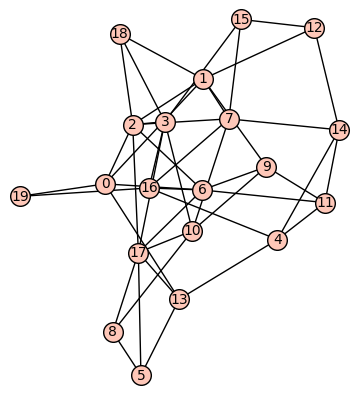

In [49]:
show(graphs.RandomGNP(20, 0.2))

In [58]:
G = Graph(graphs.RandomGNM(20,20)); G.edges()

[(0, 10, None),
 (1, 4, None),
 (1, 18, None),
 (3, 4, None),
 (3, 11, None),
 (3, 13, None),
 (4, 10, None),
 (4, 14, None),
 (5, 15, None),
 (5, 16, None),
 (5, 19, None),
 (7, 18, None),
 (8, 11, None),
 (8, 14, None),
 (9, 12, None),
 (11, 14, None),
 (12, 15, None),
 (13, 14, None),
 (14, 16, None),
 (14, 17, None)]

In [66]:
import itertools
l = list(range(20))
s = itertools.combinations(l,2)
s2 = Subsets(l, 2)
edges = Subsets(s, 20).random_element()
G = Graph(list(edges))

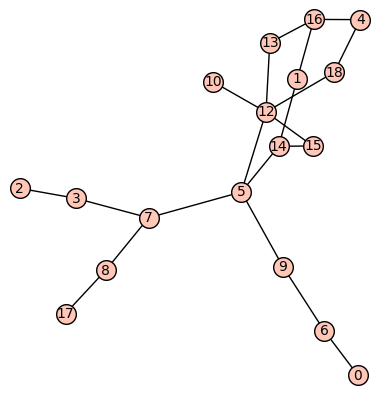

In [67]:
G.plot()

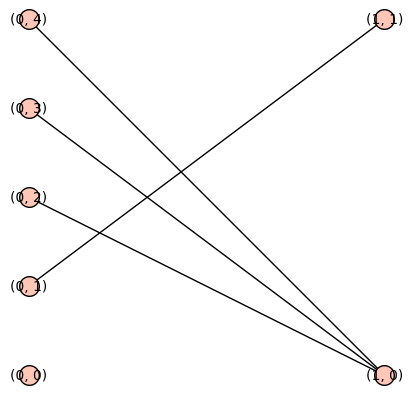

In [68]:
graphs.RandomBipartite(5, 2, 0.5).plot()

There are many [operations available for graphs](http://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html#sage.graphs.generic_graph.GenericGraph.igraph_graph). Here are some standard ones (which I'll explain as we go along).

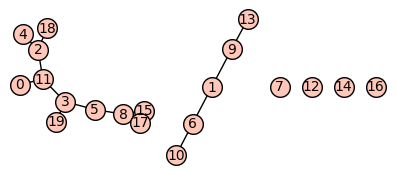

In [69]:
G = graphs.RandomGNP(20, 0.1)
show(G)

In [70]:
# Find connected components
G.connected_components()

[[0, 2, 3, 4, 5, 8, 11, 15, 17, 18, 19],
 [1, 6, 9, 10, 13],
 [7],
 [12],
 [14],
 [16]]

In [71]:
G.connected_components_number()

6

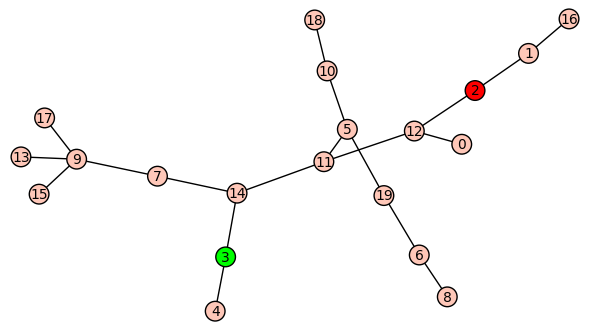

In [72]:
G = graphs.RandomTree(20)
plot(G, vertex_size=200, vertex_colors={'#FF0000': [2], '#00FF00': [3]})

In [73]:
# Compute distance
G.distance(2, 3)

4

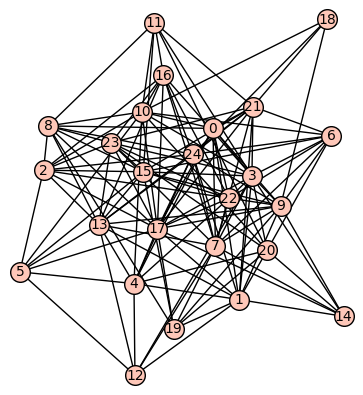

In [74]:
G = graphs.RandomGNP(25, 0.4)
plot(G)

In [75]:
# Compute minimum cut (as in maxflow-mincut)
G.edge_cut(2, 18, algorithm="FF", vertices=True)

[4,
 [(9, 18, None), (10, 18, None), (18, 21, None), (18, 24, None)],
 [[2,
   16,
   5,
   23,
   8,
   13,
   15,
   17,
   3,
   22,
   7,
   24,
   10,
   11,
   4,
   12,
   20,
   21,
   0,
   19,
   1,
   9,
   6,
   14],
  [18]]]

In [76]:
# Compute minimum spanning tree for a particular weight function
G.min_spanning_tree(weight_function = lambda e: e[0]+e[1])

[(0, 1, None),
 (0, 3, None),
 (0, 4, None),
 (0, 7, None),
 (0, 8, None),
 (0, 9, None),
 (0, 10, None),
 (0, 17, None),
 (0, 21, None),
 (0, 22, None),
 (1, 12, None),
 (1, 13, None),
 (1, 14, None),
 (1, 19, None),
 (1, 20, None),
 (1, 24, None),
 (2, 5, None),
 (2, 15, None),
 (2, 16, None),
 (2, 23, None),
 (3, 6, None),
 (3, 11, None),
 (4, 5, None),
 (9, 18, None)]

In [77]:
# Compute chromatic number
G.chromatic_number()

6

In [78]:
# Compute automorphism group
G = graphs.PetersenGraph()
H = G.automorphism_group()
print H.order()

120


In [79]:
S5 = SymmetricGroup(5)
H.is_isomorphic(S5)

True

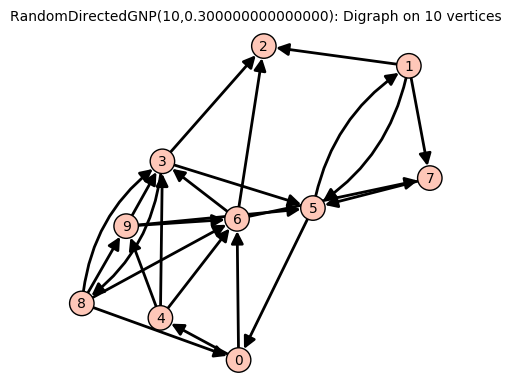

In [81]:
digraphs.RandomDirectedGNP(10, .3)

In [0]:
graphs?

In [0]:
digraphs?